# CUSTOMER CHURN PREDICTION USING DECISION TREE

### Importing the necessary libraries

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Load the CSV Datatset

In [11]:
df = pd.read_csv("Telco-Customer-Churn.csv")   # change file name if needed
print("Dataset Loaded:")
print(df.head(), "\n")

Dataset Loaded:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

### Encode all non-numeric columns

In [12]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [13]:
X = df.drop("Churn", axis=1)   
y = df["Churn"] 

### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Train Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Predicition & Evaluation

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")


Model Accuracy: 0.7856 (78.56%)



In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.43      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



### Confusion Matrix + Heatmap

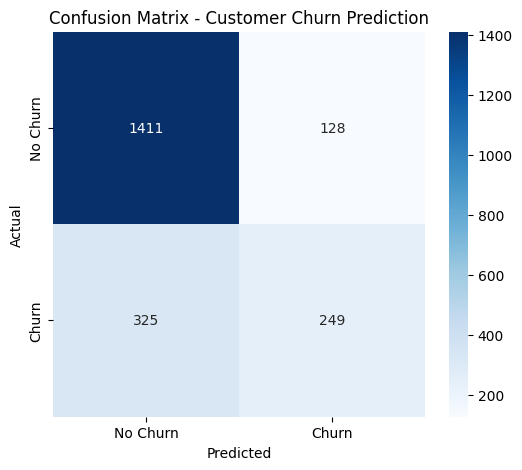

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Customer Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree Plot

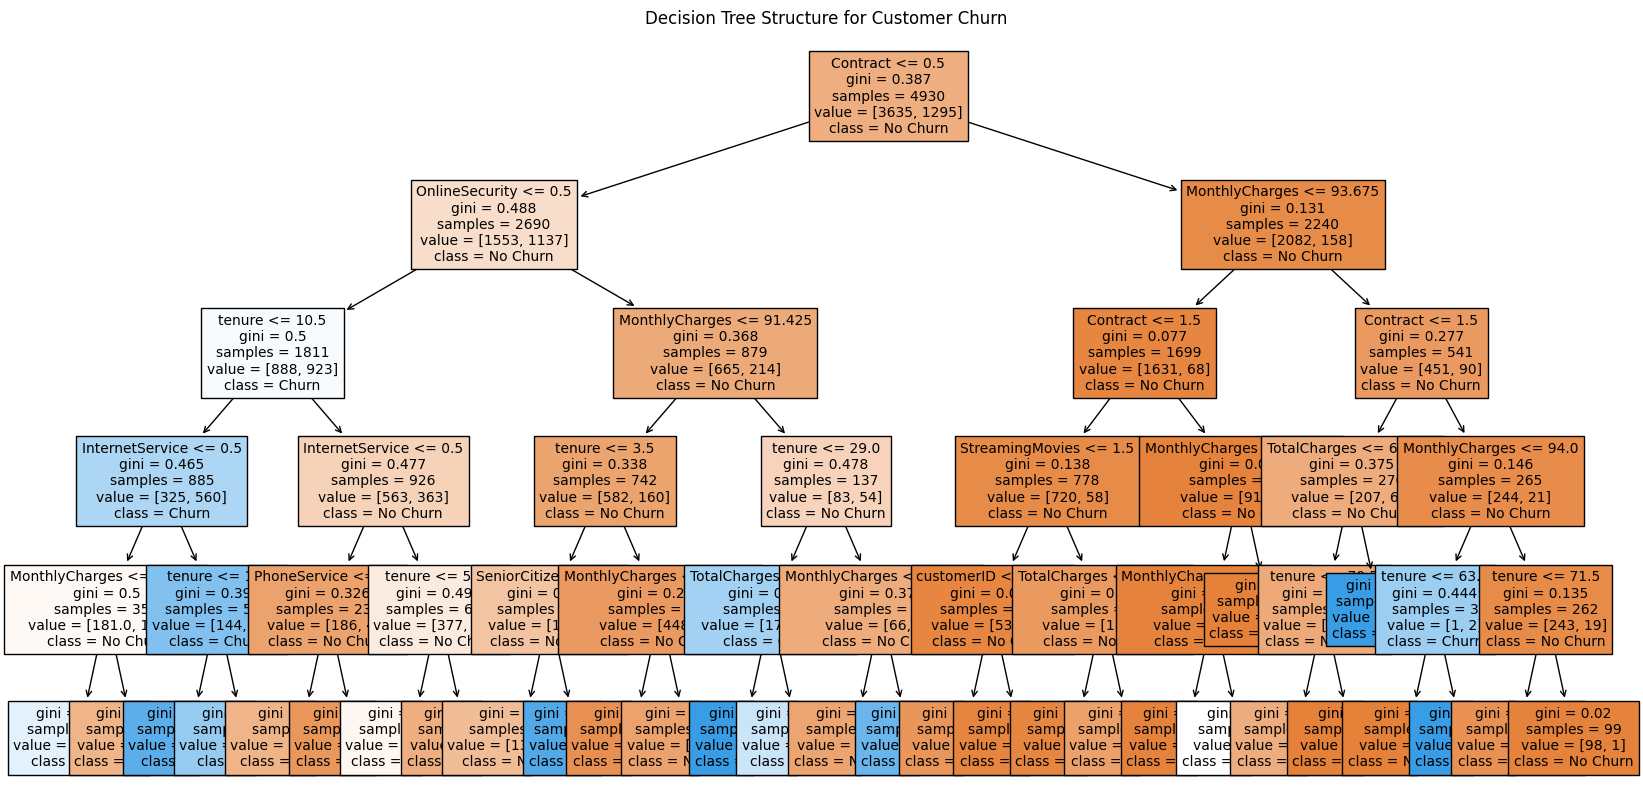

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=["No Churn", "Churn"],
          fontsize=10)
plt.title("Decision Tree Structure for Customer Churn")
plt.show()